In [57]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix



In [92]:
SPY = pd.read_csv("SPY.csv").set_index('Date').iloc[::-1]
print(SPY['Change %'][SPY['Change %']> 0.0].count(), 'out of',SPY['Change %'].count())
MA20 = SPY['Price'].rolling(20).mean()
MA60 = SPY['Price'].rolling(60).mean()
MA200 = SPY['Price'].rolling(200).mean()
RSTD = SPY['Price'].rolling(20).std()
BLUp = MA20 + 2*RSTD
BLDown = MA20 - 2*RSTD
dayAfter = SPY['Change %'].shift(-1)

MA20 = pd.DataFrame(MA20).rename(columns={'Price': 'MA20'})
MA60 = pd.DataFrame(MA60).rename(columns={'Price': 'MA60'})
MA200 = pd.DataFrame(MA200).rename(columns={'Price': 'MA200'})
RSTD = pd.DataFrame(RSTD).rename(columns={'Price': 'RSTD'})
BLUp = pd.DataFrame(BLUp).rename(columns={'Price': 'BLUp'})
BLDown = pd.DataFrame(BLDown).rename(columns={'Price': 'BLDown'})
dayAfter = pd.DataFrame(dayAfter).rename(columns={'Change %': 'dayAfter'})

resultThreshhold = 0.05
dayAfter[dayAfter > resultThreshhold] = 1
dayAfter[dayAfter <= resultThreshhold] = 0

SPY = SPY.join(MA20).join(MA60).join(MA200).join(RSTD).join(BLUp).join(BLDown).join(dayAfter)
SPY = SPY.dropna()
SPYNorm = SPY/SPY.max()
SPY.to_csv("techOutput", header=True)
print(list(SPY))
# RSTD.hist(bins=40)
# plt.show()
# change.mean()

2605 out of 4914
['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'MA20', 'MA60', 'MA200', 'RSTD', 'BLUp', 'BLDown', 'dayAfter']


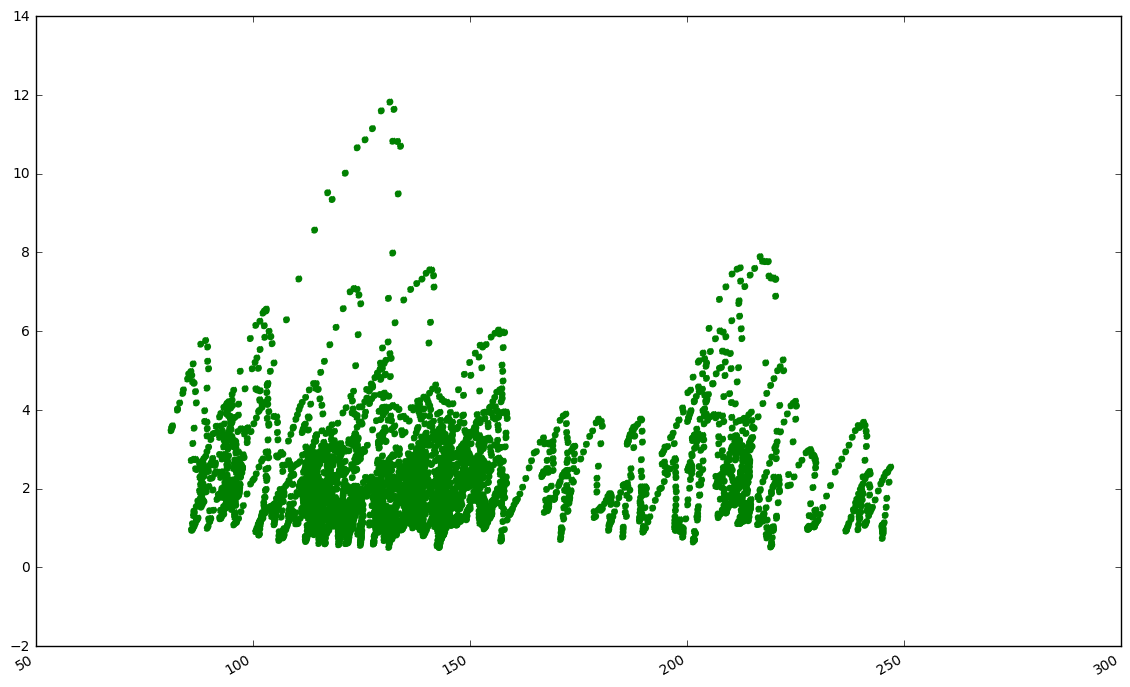

In [93]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

# SPYNorm.plot(style=['o','rx'])
fig = plt.scatter(SPY['BLUp'], SPY['RSTD'], linestyle="dashed", color="green")
# fig2= plt.scatter(SPY['Low'], SPY['RSTD'])

fig_size = [14, 9]
plt.rcParams["figure.figsize"] = fig_size
# fig = plt.figure(figsize=(5,8))
plt.show()


In [80]:
def modelExec(df):
    train, test = train_test_split(df, test_size = 0.2)
    x=train.as_matrix(columns=train.columns[:-1])
    y=train.as_matrix(columns=train.columns[-1:]).ravel()
    x_=test.as_matrix(columns=test.columns[:-1])
    y_=test.as_matrix(columns=test.columns[-1:]).ravel()
    clf = SVC()
    print(y)
    clf.fit(x, y)
    y_pred = clf.predict(x_)
    return {"cf": confusion_matrix(y_, y_pred), "ac": accuracy_score(y_, y_pred) }

sumAc = 0;
sumCf = np.zeros(shape=(2,2))
numberofIterations = 1
for i in range(numberofIterations):
    executedModel =  modelExec(SPYNorm)
    sumAc += executedModel["ac"]
    sumCf += executedModel["cf"]

print('TN   FP')
print('FN   TP')
print(sumCf/numberofIterations)
print('accurracy', sumAc/numberofIterations)


[ 0.  1.  1. ...,  1.  0.  0.]
TN   FP
FN   TP
[[  90.  403.]
 [  92.  358.]]
accurracy 0.475079533404


In [76]:
sumAc = 0;
sumCf = np.zeros(shape=(2,2))
numberofIterations = 1
for i in range(numberofIterations):
    executedModel =  modelExec(joinDf)
    sumAc += executedModel["ac"]
    sumCf += executedModel["cf"]

print('TN   FP')
print('FN   TP')
print(sumCf/numberofIterations)
print('accurracy', sumAc/numberofIterations)

NameError: name 'joinDf' is not defined